In [1]:
# Criação da base com os agrupamentos por centroid 
#Link para deixar os agrupamentos coloridos 
# https://cadernoscicomp.com.br/tutorial/matplot-e-pandas/matplot-criando-um-grafico-simples-e-adicionando-labels-grid-colorindo-titulo-e-legendas/  
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c",

import pandas as pd
baseD = pd.read_csv('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Agrupamento/bikes.csv', sep=';', low_memory=False);
baseD.head();

In [2]:
print("teste");

teste


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

baseD = pd.read_csv('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Agrupamento/bikes.csv', sep=';', low_memory=False);

# Apaga essas colunas
listaApagar = ['start_station', 'id', 'm_duration', 'duration', 'start_date', 'end_date', 'start_station_name', 'end_station', 'end_station_name', 'bike', 'type', 'end_latitude', 'end_longitude', 'm_distance', 'season', 'weekday', 'workday', 'holiday', 'month', 'day', 'hour'];
baseD = baseD.drop(listaApagar, axis=1);

baseD = baseD.groupby(['start_longitude','start_latitude']).size().reset_index().rename(columns={0:'count'});
baseD = baseD.drop('count', axis=1);

baseD.head();

winsound.Beep(2000, 800); winsound.Beep(2000, 800);

In [6]:
display(baseD);
# baseD.head();

,start_longitude,start_latitude
0,-77.368416,38.955314
1,-77.363094,38.955171
2,-77.361902,38.962524
3,-77.359718,38.957037
4,-77.358815,38.962095
...,...,...
479,-76.937230,38.889935
480,-76.933099,38.908473
481,-76.931862,38.898536
482,-76.925907,38.897407


In [117]:
# X = baseD
# # plot 
# plt.rcParams['figure.figsize'] = (10,10) 
# plt.scatter( X["start_longitude"], X["start_latitude"], c='white', marker='o', edgecolor='black', s=50) 

# plt.ylabel('latitude') 
# plt.xlabel('longitude') 
# plt.show()

## **Criação dos agrupamentos:** ##

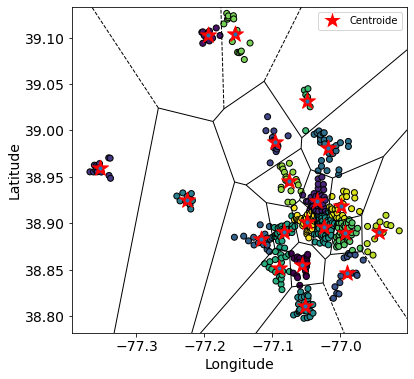

In [171]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans
from matplotlib.lines import Line2D # legenda do centroide
from scipy.spatial import Voronoi, voronoi_plot_2d

plt.rcParams['figure.figsize'] = (6,6) 

JJ = baseD
# k-means++

# tamanhos 8, 13 e 20
QntClusters = 20
kmeans = KMeans(n_clusters = QntClusters, n_init = 50, max_iter = 800)
pred_y = kmeans.fit_predict(JJ)
# rotuloCluster8 = kmeans.labels_

centers = kmeans.cluster_centers_
vor = Voronoi(centers)
voronoi_plot_2d(vor, show_vertices = False)

plt.scatter(JJ["start_longitude"], JJ["start_latitude"], c = pred_y, marker='o', edgecolor='black') #posicionamento dos eixos x e y

plt.xlabel("Longitude", fontsize=14);
plt.ylabel("Latitude", fontsize=14);
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
getLat = plt.xlim()
getLong = plt.ylim()

# plt.xlim(-77.1731, -76.8908) #range do eixo x
# plt.ylim(38.7897, 39.14) #range do eixo y

# Como plotar Voronoi diagram?

# legenda do centroide
red_circle = Line2D([0], [0], marker='*', color='w', label='Centroide', markerfacecolor='r', markersize=20),
plt.legend(handles=red_circle)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 280, c = 'red', marker="*")

# plt.show()
plt.savefig('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Imagens/2clusterizacaoEstacoes20.png', bbox_inches='tight')

In [ ]:
# print(getLong, getLat)

## **Geração das bases de dados:** ##

In [49]:
import pandas as pd
import numpy as np

base = pd.read_csv('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Agrupamento/bikes.csv', sep=';', low_memory=False);
baseD = base.copy()
baseC = base.copy()
listaApagar = ['start_station', 'id', 'm_duration', 'duration', 'start_date', 'end_date', 'start_station_name', 'end_station', 'end_station_name', 'bike', 'type', 'end_latitude', 'end_longitude', 'm_distance', 'season', 'weekday', 'workday', 'holiday', 'month', 'day', 'hour'];
baseD = baseD.drop(listaApagar, axis=1);

baseD = baseD.groupby(['start_longitude','start_latitude']).size().reset_index().rename(columns={0:'count'});
baseD = baseD.drop('count', axis=1);
baseD.head();

In [12]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 500  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration); winsound.Beep(frequency, duration);

In [65]:
AgrupamentoCluster8 = baseD.copy()
AgrupamentoCluster13 = baseD.copy()
AgrupamentoCluster20 = baseD.copy()

Cluster8 = pd.DataFrame(rotuloCluster8)
Cluster13 = pd.DataFrame(rotuloCluster13)
Cluster20 = pd.DataFrame(rotuloCluster20)

AgrupamentoCluster8['cluster'] = Cluster8
AgrupamentoCluster13['cluster'] = Cluster13
AgrupamentoCluster20['cluster'] = Cluster20

baseCluster8 = pd.merge(teste, AgrupamentoCluster8, how='left', on=['start_longitude','start_latitude'])
baseCluster13 = pd.merge(teste, AgrupamentoCluster13, how='left', on=['start_longitude','start_latitude'])
baseCluster20 = pd.merge(teste, AgrupamentoCluster20, how='left', on=['start_longitude','start_latitude'])

In [79]:
# não está apagando as linhas com lat e long vazias ;-;
linhas_remover = baseCluster8.loc[baseCluster8['start_longitude'] == 'nan']
baseCluster8 = baseCluster8.drop(linhas_remover.index)

linhas_remover2 = baseCluster13.loc[baseCluster13['start_longitude'] == 'nan']
baseCluster13 = baseCluster13.drop(linhas_remover2.index)

linhas_remover3 = baseCluster20.loc[baseCluster20['start_longitude'] == 'nan']
baseCluster20 = baseCluster20.drop(linhas_remover3.index)

In [85]:
clima = pd.read_csv('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Cidade/agrupamentoHora.csv', low_memory=False);
listaApagar = ["id", "date", "weekday", "holiday", "cut_description", "qtd"]
clima = clima.drop(listaApagar, axis=1)
clima.shape

(8737, 11)

In [16]:
base8.columns

Index(['id', 'm_duration', 'duration', 'start_date', 'end_date',
       'start_station', 'start_station_name', 'end_station',
       'end_station_name', 'bike', 'type', 'start_longitude', 'end_latitude',
       'end_longitude', 'start_latitude', 'm_distance', 'season_x', 'weekday',
       'workday_x', 'holiday', 'month', 'day', 'hour', 'cluster', 'season_y',
       'workday_y', 'temperature', 'r_temperature', 'wind', 'humidity',
       'dew_point', 'pressure'],
      dtype='object')

In [3]:
pd.merge(baseCluster8, clima, how='left', on=['hour','day', 'month']).to_csv('AgrupamentoCluster8Enriquecido.csv', sep=';', index=False)
pd.merge(baseCluster13, clima, how='left', on=['hour','day', 'month']).to_csv('AgrupamentoCluster13Enriquecido.csv', sep=';', index=False)
pd.merge(baseCluster20, clima, how='left', on=['hour','day', 'month']).to_csv('AgrupamentoCluster20Enriquecido.csv', sep=';', index=False)

In [4]:
import pandas as pd
import numpy as np
base8 = pd.read_csv('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Agrupamento/AgrupamentoCluster8Enriquecido.csv', sep=';', low_memory=False);
base13 = pd.read_csv('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Agrupamento/AgrupamentoCluster13Enriquecido.csv', sep=';', low_memory=False);
base20 = pd.read_csv('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Agrupamento/AgrupamentoCluster20Enriquecido.csv', sep=';', low_memory=False);

In [24]:
# AGRUPAR QUANTIDADE DE ALUGUEIS POR HORA
grupoBase8 = base8.groupby(['month','day','hour', 'season_y', 'workday_y', 'temperature', 'r_temperature', 'wind', 'humidity', 'dew_point', 'pressure', 'weekday', 'cluster'])['hour'].count().reset_index(name="qnt")
winsound.Beep(2000, 800); winsound.Beep(2000, 800);
grupoBase13 = base13.groupby(['month','day','hour', 'season_y', 'workday_y', 'temperature', 'r_temperature', 'wind', 'humidity', 'dew_point', 'pressure', 'weekday', 'cluster'])['hour'].count().reset_index(name="qnt")
winsound.Beep(2000, 800); winsound.Beep(2000, 800);
grupoBase20 = base20.groupby(['month','day','hour', 'season_y', 'workday_y', 'temperature', 'r_temperature', 'wind', 'humidity', 'dew_point', 'pressure', 'weekday', 'cluster'])['hour'].count().reset_index(name="qnt")
winsound.Beep(2000, 800); winsound.Beep(2000, 800);

In [37]:
# grupoBase8.shape
# shape 8 = (49511, 14)
# shape 13 = (79586, 14)
# shape 20 = (111501, 14)

In [38]:
grupoBase8.to_csv('Bases para analise/grupoCluster8.csv', sep=';', index=False)
grupoBase13.to_csv('Bases para analise/grupoCluster13.csv', sep=';', index=False)
grupoBase20.to_csv('Bases para analise/grupoCluster20.csv', sep=';', index=False)

In [40]:
grupoBase8.columns

Index(['month', 'day', 'hour', 'season_y', 'workday_y', 'temperature',
       'r_temperature', 'wind', 'humidity', 'dew_point', 'pressure', 'weekday',
       'cluster', 'qnt'],
      dtype='object')

## **Método Cotovelo:** ##

In [89]:
def calculate_wcss(data):
        wcss = []
        for n in range(2, 22):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
        return wcss
    
print(calculate_wcss(JJ))

[14056810.974751238, 5473033.719718691, 2690468.26298294, 1676070.7628033087, 1097609.605962173, 648614.0083216395, 511463.98318377876, 402280.9702161896, 300418.4818123851, 208877.852265607, 127604.8149664064, 102263.76838655825, 79051.36672186592, 58813.22039201724, 50094.54826626929, 42640.95806003125, 36287.39548879635, 31826.405051983384, 27672.053833928294, 24583.297784662012]


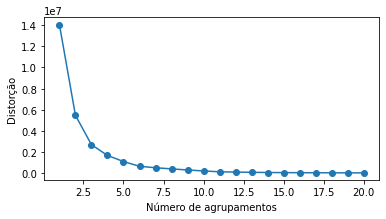

In [52]:
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos

# Colocar eixos do gráfico
plt.rcParams['figure.figsize'] = (6,3) 
plt.xlabel("Número de agrupamentos");
plt.ylabel("Distorção");

plt.plot(
    [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    [14056810.974751238, 5473033.719718691, 2690468.26298294, 1676070.7628033087, 1097609.605962173, 648614.0083216395, 511723.9786579697, 402128.13834093243, 300550.6491978978, 208604.3440211868, 127604.81319201786, 102440.42355823328, 79164.5631059697, 58657.73326097629, 49746.578914862606, 42750.332097960214, 36317.603437994636, 31696.486840205536, 27678.4917749936, 24224.534717515875],
    marker='o')
# plt.savefig('C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/Imagens/Elbow2.png',  bbox_inches='tight')
plt.show()